# Analysis of solver scaling

These experiments measure how well the solver scales as the number of jobs increases.

# Import statements

In [1]:
from matplotlib import pyplot as plt
import matplotlib; matplotlib.font_manager._rebuild()
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
sns.set_style('ticks')
font = {
    'font.family':'Roboto',
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=2, rc=paper_rc)
current_palette = sns.color_palette()

In [2]:
# Other imports.
import csv
import os
import re

In [3]:
policy_to_label = {
    'max_min_fairness': 'LAS',
    'max_min_fairness_perf': 'LAS+perf',
    'max_min_fairness_packed': 'LAS+perf+SS'
}

In [4]:
def parse_logs(logfile):
    data = {
        'policy': [],
        'num_jobs': [],
        'runtimes': []
    }
    with open(logfile, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            policy = row['Policy']
            num_jobs = int(row['# Jobs'])
            runtimes = []
            for i in range(1, 4):
                data['policy'].append(policy_to_label[policy])
                data['num_jobs'].append(num_jobs)
                data['runtimes'].append(float(row['Trial %d' % (i)]))
    return data

In [5]:
def plot_data(data, legend_loc='upper left',
              output_filename=None):
    plt.figure(figsize=(4.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    sns.lineplot(x='num_jobs', y='runtimes', style='policy',
                 hue='policy',
                 data=data, ci='sd',
                 markers=True)
    ax.set_xlabel("Number of jobs (log2)")
    ax.set_ylabel("Seconds")
    ax.set_xscale('log', basex=2)
    ax.set_yticks([0, 100, 200, 300, 400, 500])
    ax.set_ylim([0, None])
    sns.despine()
    
    leg = plt.legend(loc=legend_loc, frameon=False)
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')

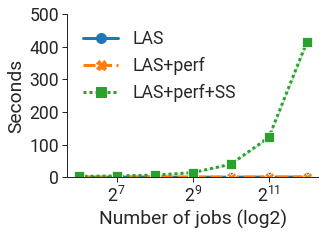

In [6]:
single_gpu_data = parse_logs('../../../logs/solver_scaling/single_gpu.csv')
plot_data(single_gpu_data)

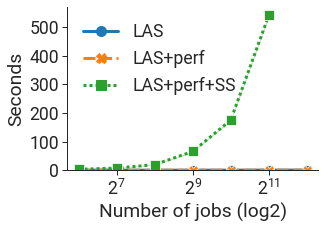

In [7]:
multi_gpu_data_with_job_type_throughputs = \
    parse_logs('../../../logs/solver_scaling/multi_gpu_job_type_throughputs.csv')
plot_data(multi_gpu_data_with_job_type_throughputs,
          output_filename="solver_scaling/multi_gpu_las_v100=36_p100=36_k80=36.pdf")

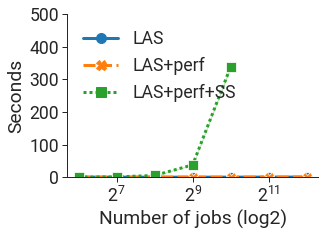

In [8]:
multi_gpu_data_with_job_throughputs = \
    parse_logs('../../../logs/solver_scaling/multi_gpu.csv')
plot_data(multi_gpu_data_with_job_throughputs)